# GPT4All RAG Eval

In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [37]:
with open('beir_metrics.json', 'r') as file:
    beir_metrics = json.load(file)['datasets']
metrics = {
    "NDCG@10" : beir_metrics[0]['data'],
    "MAP@10" : beir_metrics[1]['data'],
    "Recall@10" : beir_metrics[2]['data'],
    "Precision@10" : beir_metrics[3]['data']
}

In [39]:
def plot_metric_for_dataset(dataset_name: str, metric_name: str):
    fig, ax = plt.subplots()
    ax.bar(
        np.arange(6),
        [
            x[dataset_name]
            for x in metrics[metric_name][1:]
        ]
    )
    ax.set_title(f"{metric_name} on {dataset_name}")
    plt.show()

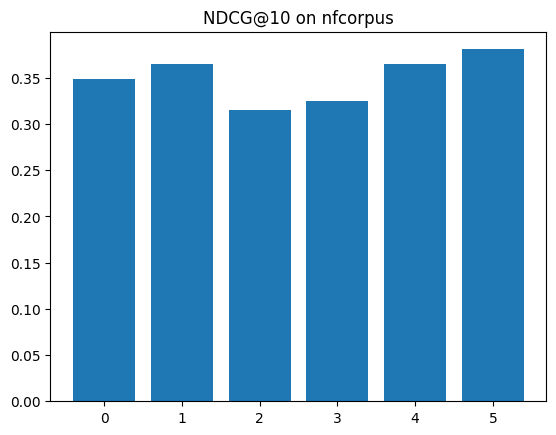

In [40]:
plot_metric_for_dataset("nfcorpus", "NDCG@10")